# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [29]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [30]:
# Set the API base URL
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | norman wells
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | verkhnevilyuysk
Processing Record 6 of Set 1 | sumbawa
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | bonnyville
Processing Record 9 of Set 1 | crab hill
City not found. Skipping...
Processing Record 10 of Set 1 | assiniboia
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | xiaoweizhai
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | nieuwpoort
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | mount gambier
Processing Record 18 of Set 1 | zhangye
Processing Record 19 of Set 1 | saleaula
City not found. Skipping...
Processing Record 20 of Set 1 | qaa

Processing Record 36 of Set 4 | te anau
Processing Record 37 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 38 of Set 4 | stornoway
Processing Record 39 of Set 4 | lagoa
Processing Record 40 of Set 4 | lubango
Processing Record 41 of Set 4 | klaksvik
Processing Record 42 of Set 4 | sao gabriel da cachoeira
Processing Record 43 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 44 of Set 4 | tiksi
Processing Record 45 of Set 4 | salvador
Processing Record 46 of Set 4 | ugoofaaru
Processing Record 47 of Set 4 | vuktyl
Processing Record 48 of Set 4 | lewiston
Processing Record 49 of Set 4 | hilo
Processing Record 0 of Set 5 | tuburan
Processing Record 1 of Set 5 | dunedin
Processing Record 2 of Set 5 | bargal
City not found. Skipping...
Processing Record 3 of Set 5 | benghazi
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | tessalit
Processing Record 6 of Set 5 | mwene-ditu
Processing Record 7 of Set 5 | belushya guba
City not f

Processing Record 28 of Set 8 | halifax
Processing Record 29 of Set 8 | laguna
Processing Record 30 of Set 8 | saint-louis
Processing Record 31 of Set 8 | berlevag
Processing Record 32 of Set 8 | mandera
Processing Record 33 of Set 8 | kavaratti
Processing Record 34 of Set 8 | mountain home
Processing Record 35 of Set 8 | komsomolskiy
Processing Record 36 of Set 8 | paita
Processing Record 37 of Set 8 | thurso
Processing Record 38 of Set 8 | kandrian
Processing Record 39 of Set 8 | alta floresta
Processing Record 40 of Set 8 | saint-marc-des-carrieres
Processing Record 41 of Set 8 | darnah
Processing Record 42 of Set 8 | burgersdorp
Processing Record 43 of Set 8 | yenagoa
Processing Record 44 of Set 8 | amapa
Processing Record 45 of Set 8 | balikpapan
Processing Record 46 of Set 8 | bara
Processing Record 47 of Set 8 | nova prata
Processing Record 48 of Set 8 | dalbandin
Processing Record 49 of Set 8 | ijaki
City not found. Skipping...
Processing Record 0 of Set 9 | skalistyy
City not 

Processing Record 14 of Set 12 | bondoukou
Processing Record 15 of Set 12 | qaqortoq
Processing Record 16 of Set 12 | oyem
Processing Record 17 of Set 12 | talas
Processing Record 18 of Set 12 | khonuu
City not found. Skipping...
Processing Record 19 of Set 12 | maskinonge
Processing Record 20 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 21 of Set 12 | yarmouth
Processing Record 22 of Set 12 | sinor
Processing Record 23 of Set 12 | veraval
Processing Record 24 of Set 12 | uniontown
Processing Record 25 of Set 12 | petropavlivka
Processing Record 26 of Set 12 | odemira
Processing Record 27 of Set 12 | kirovskiy
Processing Record 28 of Set 12 | araouane
Processing Record 29 of Set 12 | tual
Processing Record 30 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 31 of Set 12 | hay river
Processing Record 32 of Set 12 | merritt island
Processing Record 33 of Set 12 | pochutla
Processing Record 34 of Set 12 | natal
Processing Record 35 of Set 12 | betaf

In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,norman wells,65.2820,-126.8329,-27.98,69,20,8.75,CA,1670294441
1,busselton,-33.6500,115.3333,22.30,38,0,4.29,AU,1670294441
2,kapaa,22.0752,-159.3190,26.18,87,75,6.17,US,1670294442
3,verkhnevilyuysk,63.4453,120.3167,-23.37,94,100,3.17,RU,1670294442
4,ushuaia,-54.8000,-68.3000,5.79,65,40,7.72,AR,1670294443


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,norman wells,65.2820,-126.8329,-27.98,69,20,8.75,CA,1670294441
1,busselton,-33.6500,115.3333,22.30,38,0,4.29,AU,1670294441
2,kapaa,22.0752,-159.3190,26.18,87,75,6.17,US,1670294442
3,verkhnevilyuysk,63.4453,120.3167,-23.37,94,100,3.17,RU,1670294442
4,ushuaia,-54.8000,-68.3000,5.79,65,40,7.72,AR,1670294443


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

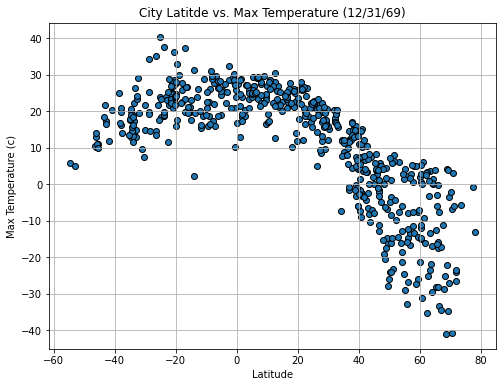

In [35]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Max Temp"],edgecolors="black")
date = time.strftime("%D", time.localtime(city_data_df["Max Temp"][0]))

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitde vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

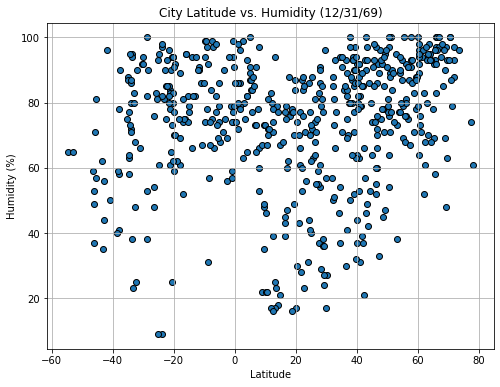

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Humidity"],edgecolors="black")
date = time.strftime("%D", time.localtime(city_data_df["Max Temp"][0]))


# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

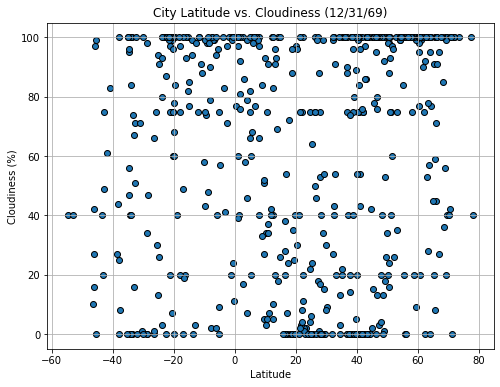

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Cloudiness"],edgecolors="black")
date = time.strftime("%D", time.localtime(city_data_df["Max Temp"][0]))


# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

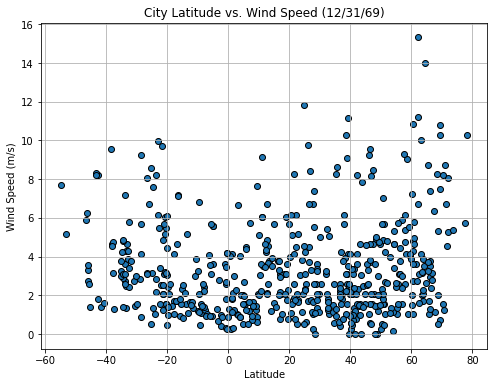

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Wind Speed"],edgecolors="black")
date = time.strftime("%D", time.localtime(city_data_df["Max Temp"][0]))


# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def linregression(x,y,ylabel,a,b):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_value = x * slope + intercept
    eqtn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(8, 6))
    plt.scatter(x=x, y=y, edgecolors="black")
    plt.plot(x, regress_value, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.annotate(eqtn,(a,b),fontsize=15,color="red")
    print(f"The r-value is : {rvalue**2}")
    plt.show()

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,norman wells,65.2820,-126.8329,-27.98,69,20,8.75,CA,1670294441
2,kapaa,22.0752,-159.3190,26.18,87,75,6.17,US,1670294442
3,verkhnevilyuysk,63.4453,120.3167,-23.37,94,100,3.17,RU,1670294442
5,bonnyville,54.2668,-110.7350,-21.38,89,99,4.67,CA,1670294255
6,assiniboia,49.6334,-105.9845,-16.10,78,100,4.63,CA,1670294443


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,busselton,-33.6500,115.3333,22.30,38,0,4.29,AU,1670294441
4,ushuaia,-54.8000,-68.3000,5.79,65,40,7.72,AR,1670294443
7,rikitea,-23.1203,-134.9692,24.02,81,100,6.17,PF,1670294444
13,mount gambier,-37.8333,140.7667,19.77,41,100,3.17,AU,1670294331
16,mar del plata,-38.0023,-57.5575,21.01,78,0,4.63,AR,1670294447


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.7027130607968082


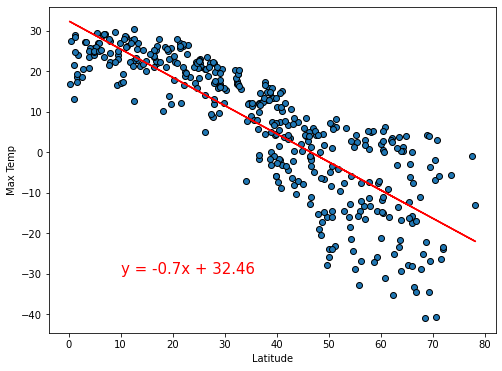

In [42]:
# Linear regression on Northern Hemisphere
linregression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Max Temp",10,-30)

The r-value is : 0.24198432460188374


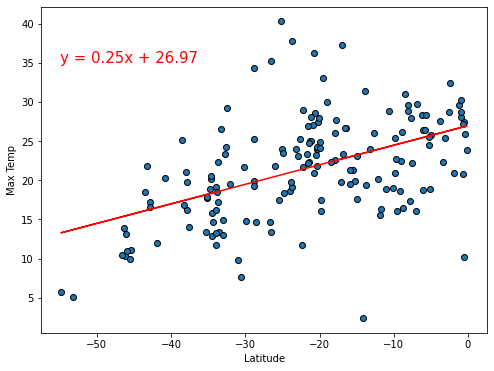

In [43]:
# Linear regression on Southern Hemisphere
linregression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Max Temp",-55,35)

**Discussion about the linear relationship:**

By looking at the scatterplots above we can clearly see that on Northern Hemisphere for greater latitudes, the maximum temperature gets lower and the relation between latitude and maximum temperature is inverse. For Southern Hemisphere on the other hand, the relation is not inverse, meaning the greater the latitude, the higher the max temperature gets.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.10676048911778957


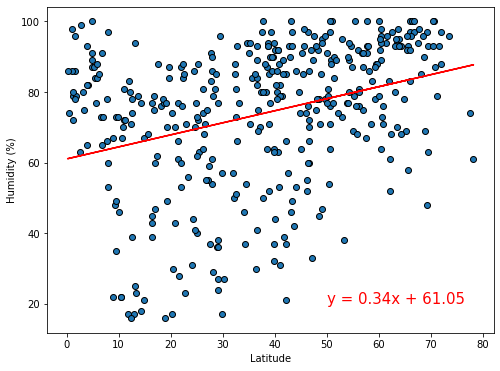

In [44]:
# Northern Hemisphere
linregression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Humidity (%)",50,20)

The r-value is : 0.08558930336764174


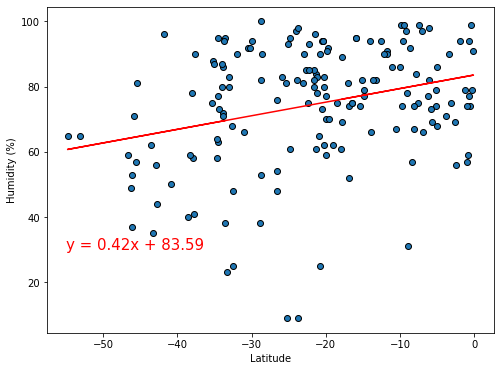

In [45]:
# Southern Hemisphere
linregression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Humidity (%)",-55,30)

**Discussion about the linear relationship:**

These two charts demonstrate that the relation between latitude and humidity is always direct, doesn't matter if the city is on Northern or Southern Hemisphere. So the greater the latitude, the higher the humidity percentage. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.048040259890372874


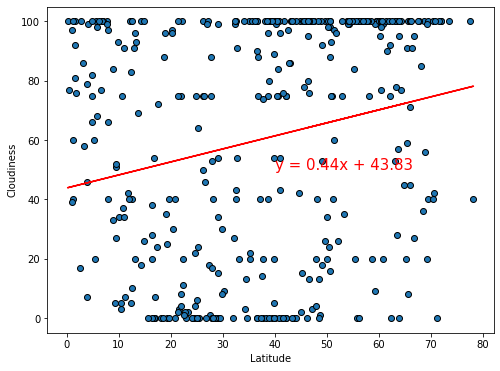

In [46]:
# Northern Hemisphere
linregression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Cloudiness",40,50)

The r-value is : 0.08628235048032148


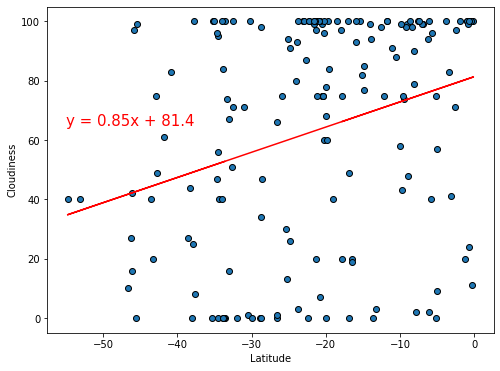

In [51]:
# Southern Hemisphere
linregression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Cloudiness",-55,65)

**Discussion about the linear relationship:**

For cloudliness as well, we can see that the relation with latitude is always direct and it gets more cloudy on greater latitudes in both Northern or Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.05315745404385849


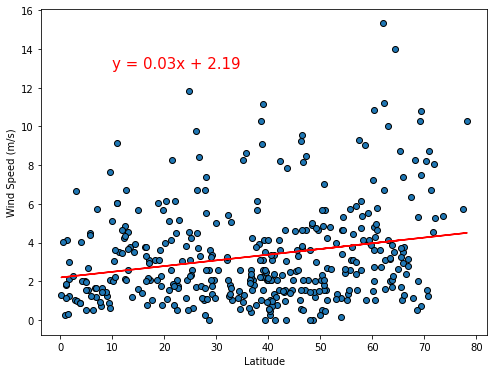

In [54]:
# Northern Hemisphere
linregression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Wind Speed (m/s)",10,13)

The r-value is : 0.11919377538712857


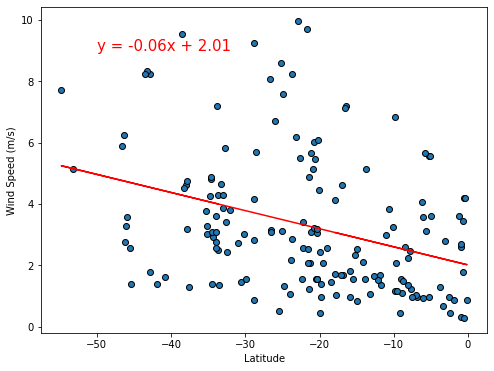

In [49]:
# Southern Hemisphere
linregression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Wind Speed (m/s)",-50,9)

**Discussion about the linear relationship:** 

Diagrams above show that there's a slight change in wind speed with respect to latitude and for Northern Hemisphere this relation is direct so for greater latitudes we expect higher wind speed, and for Southern Hemisphere there's an inverse relation and wind speed drops at greater latitudes.